## Part 0: Reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_excel('D:\\Internshala\\Fittlyf\\test_DataScience.xlsx')
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [4]:
data.dtypes

Year                    int64
Month                  object
Laptop/Desktop         object
Type_of_Customers?     object
Coming from            object
Place_in_India         object
Level 1               float64
Level 2               float64
Level 3                 int64
Level 4                 int64
dtype: object

In [5]:
data.Place_in_India.value_counts()

Hyderabad    432
Pune         432
Bengaluru    432
Indore       432
Dehradun     432
Name: Place_in_India, dtype: int64

In [6]:
# This dataset belongs to the geo-location of India, that consists of 5 cities such as Bengaluru, Pune, Indore, Dehradun and Hyderabad.
# As per my intuition, Level could be categories of products such as electronics, clothing, grocery, appliances etc.
# So each level represents the sales price of a particular product type.

## Part 1: Data Cleaning

In [7]:
data.isnull().sum()

Year                     0
Month                    0
Laptop/Desktop           0
Type_of_Customers?       0
Coming from              0
Place_in_India           0
Level 1               1079
Level 2               1079
Level 3                  0
Level 4                  0
dtype: int64

In [8]:
def data_cleaning():
    data['Level 1'] = data['Level 1'].fillna(data['Level 1'].mean())
    data['Level 2'] = data['Level 2'].fillna(data['Level 2'].mean())
    data.replace({'Month':{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
                           'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}},inplace=True)
    data.replace({'Coming from': {'Came_From_LinkedIn':'LinkedIn', 'Landed_Directly':'Direct_traffic'}}, inplace=True)
    data['Month_Year'] = data.apply(lambda x: datetime.strptime(f"{int(x.Year)}-{int(x.Month)}-{int(1)}", '%Y-%m-%d'), axis=1)
    data['Month_Year'] = data['Month_Year'].dt.strftime('%d-%m-%Y')
    a = data.pop('Month_Year')
    data.insert(2, 'Month_Year', a)
data_cleaning()

In [9]:
data

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


## Part 2: Descriptive Statistics

In [10]:
def descriptive_stats():
    df = data[['Year', 'Month' , 'Laptop/Desktop' , 'Type_of_Customers?' , 'Coming from' , 'Place_in_India']]
    print(df)
    print('\n')
    print(df.describe(include='all'))
    print('\n')
    print(df.nunique())
    print('\n')
    print(df.apply(lambda x: pd.unique(x).tolist()))
    print('\n')
    print(df.dtypes)
descriptive_stats()

      Year  Month   Laptop/Desktop Type_of_Customers?           Coming from  \
0     2020      1  Desktop_Website  Existing_Customer              LinkedIn   
1     2020      1  Desktop_Website  Existing_Customer              LinkedIn   
2     2020      1  Desktop_Website  Existing_Customer              LinkedIn   
3     2020      1  Desktop_Website  Existing_Customer              LinkedIn   
4     2020      1  Desktop_Website  Existing_Customer              LinkedIn   
...    ...    ...              ...                ...                   ...   
2155  2022     12   Laptop_Website       New_Customer  Unidentified_Sources   
2156  2022     12   Laptop_Website       New_Customer  Unidentified_Sources   
2157  2022     12   Laptop_Website       New_Customer  Unidentified_Sources   
2158  2022     12   Laptop_Website       New_Customer  Unidentified_Sources   
2159  2022     12   Laptop_Website       New_Customer  Unidentified_Sources   

     Place_in_India  
0         Bengaluru  
1      

## Part 3: Prescriptive Statistics - I

In [11]:
data1 = data.loc[data['Year'] > 2020]
data1

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
720,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,51753,16463
721,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,112924,46185
722,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,44096,17047
723,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,134562,55143
724,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,189015,30749
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


In [12]:
data2 = data1.drop(['Month', 'Month_Year', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from','Level 2', 'Level 3', 'Level 4'], axis =1).groupby(by=['Year','Place_in_India']).sum().sort_values(by=['Level 1'],ascending=False)
data2['Total'] = data2['Level 1'].sum()
data2.sort_values(by='Year')

Level 1         Total
Year Place_in_India                            
2021 Pune            1.845058e+08  1.223892e+09
     Indore          1.523724e+08  1.223892e+09
     Hyderabad       1.046326e+08  1.223892e+09
     Dehradun        7.697687e+07  1.223892e+09
     Bengaluru       7.346057e+07  1.223892e+09
2022 Pune            1.887674e+08  1.223892e+09
     Indore          1.676502e+08  1.223892e+09
     Hyderabad       1.183898e+08  1.223892e+09
     Dehradun        7.976635e+07  1.223892e+09
     Bengaluru       7.737021e+07  1.223892e+09

## Part 3: Prescriptive Statistics - II

In [13]:
L2divideL1 = data['Level 2'].sum()/data['Level 1'].sum()
L3divideL1 = data['Level 3'].sum()/data['Level 1'].sum()
L4divideL1 = data['Level 4'].sum()/data['Level 1'].sum()

In [14]:
data3 = {'City': data['Place_in_India'], 'Year':data['Year'],"L2/L1":L2divideL1, 'L3/L1':L3divideL1,'L4/L1':L4divideL1}

In [15]:
data3=pd.DataFrame(data3).groupby(by=['City','Year']).mean()
data3

L2/L1     L3/L1    L4/L1
City      Year                             
Bengaluru 2020  0.456983  0.192726  0.07555
          2021  0.456983  0.192726  0.07555
          2022  0.456983  0.192726  0.07555
Dehradun  2020  0.456983  0.192726  0.07555
          2021  0.456983  0.192726  0.07555
          2022  0.456983  0.192726  0.07555
Hyderabad 2020  0.456983  0.192726  0.07555
          2021  0.456983  0.192726  0.07555
          2022  0.456983  0.192726  0.07555
Indore    2020  0.456983  0.192726  0.07555
          2021  0.456983  0.192726  0.07555
          2022  0.456983  0.192726  0.07555
Pune      2020  0.456983  0.192726  0.07555
          2021  0.456983  0.192726  0.07555
          2022  0.456983  0.192726  0.07555

## Part 3: Prescriptive Statistics - III

In [16]:
data4 = data.loc[data['Year'] > 2020]
data4

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
720,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,51753,16463
721,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,112924,46185
722,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,44096,17047
723,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,134562,55143
724,2021,1,01-01-2021,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,189015,30749
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


In [17]:
data5 = data4[['Year','Place_in_India','Level 4']]
data5.groupby(by=['Place_in_India', 'Year']).sum().sort_values(by=["Level 4"],ascending=True)

Level 4
Place_in_India Year          
Dehradun       2021   2445091
               2022   2673864
Bengaluru      2021   3140030
               2022   3752706
Hyderabad      2021   7836311
               2022   8211936
Pune           2022  11208722
               2021  12805835
Indore         2022  15104408
               2021  17533698

## Part 4: Simple Machine Learning

In [18]:
data6 = data[['Level 4']]
data6=data6.set_index(data.Month_Year)
data6

,Level 4
Month_Year,
01-01-2020,17178
01-01-2020,11916
01-01-2020,19461
01-01-2020,110667
01-01-2020,46033
...,...
01-12-2022,1882
01-12-2022,16703
01-12-2022,2089


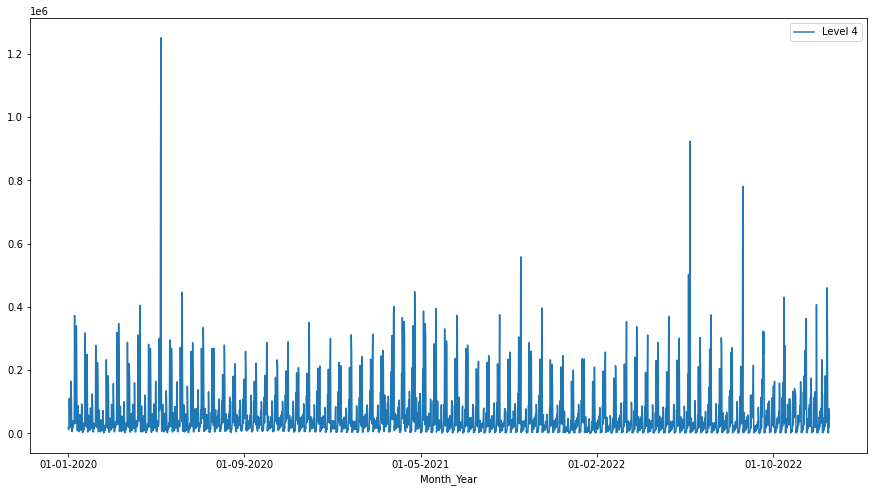

In [19]:
data6.columns = ['Level 4']
data6.plot(figsize=(15,8));

In [20]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data6['Level 4'])


1. ADF :  -10.07833169659003
2. P-Value :  1.2070774227037813e-17
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression: 2133
5. Critical Values :
	 1% :  -3.433419473570619
	 5% :  -2.862895974588963
	 10% :  -2.5674918550982277


In [21]:
#pip install pmdarima

  Using cached pmdarima-2.0.2-cp38-cp38-win_amd64.whl (571 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data6['Level 4'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55000.885, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55240.425, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55040.488, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55039.370, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56069.593, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55032.680, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55038.799, Time=0.86 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=55002.386, Time=1.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=55002.855, Time=1.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55038.590, Time=0.49 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55020.234, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55036.272, Time=1.02 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=54826.946, Time=8.15 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=54994.410, Time=3.52 sec
 ARIMA(3,0,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2160
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -27405.473
Date:                Sat, 03 Dec 2022   AIC                          54826.946
Time:                        17:11:28   BIC                          54872.369
Sample:                             0   HQIC                         54843.560
                               - 2160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.651e+04   1.01e+04      4.624      0.000    2.68e+04    6.62e+04
ar.L1         -1.0117      0.033    -30.326      0.000      -1.077      -0.946
ar.L2         -0.0256      0.051     -0.501      0.616      -0.126       0.075
ar.L3          0.5901      0.031     19.045      0.000       0.529       0.651
ma.L1          1.5060      0.036     42.221      0.000       1.436       1.576
ma.L2          0.7614      0.059     12.862      0.000       0.645       0.877
ma.L3         -0.1301      0.035     -3.686      0.000      -0.199      -0.061
sigma2      6.745e+09      0.753   8.95e+09      0.000    6.75e+09    6.75e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             51421.80
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             2.75
Prob(H) (two-sided):                  0.29   Kurtosis:                        26.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+30. Standard errors may be unstable.
"""

In [24]:
print(data6.shape)
train=data6.iloc[:-500]
test=data6.iloc[-500:]
print(train.shape,test.shape)

(2160, 1)
(1660, 1) (500, 1)


In [25]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Level 4'],order=(3,0,3))
model=model.fit()
model.summary()

C:\Users\Ashwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Level 4   No. Observations:                 1660
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -20963.512
Date:                Sat, 03 Dec 2022   AIC                          41943.024
Time:                        17:12:49   BIC                          41986.341
Sample:                             0   HQIC                         41959.079
                               - 1660                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.844e+04   3576.754     16.339      0.000    5.14e+04    6.55e+04
ar.L1         -1.0111      0.029    -35.006      0.000      -1.068      -0.954
ar.L2         -0.8933      0.040    -22.351      0.000      -0.972      -0.815
ar.L3         -0.1593      0.034     -4.619      0.000      -0.227      -0.092
ma.L1          1.4533      0.027     54.059      0.000       1.401       1.506
ma.L2          1.4219      0.034     42.150      0.000       1.356       1.488
ma.L3          0.6764      0.029     22.995      0.000       0.619       0.734
sigma2       5.84e+09      0.086   6.79e+10      0.000    5.84e+09    5.84e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             34176.38
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             3.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.99e+29. Standard errors may be unstable.
"""

In [26]:
predict_ARIMA = model.forecast(len(test))
predict_ARIMA = np.exp(predict_ARIMA)-1
predict_ARIMA

C:\Users\Ashwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ashwin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


1660    inf
1661    inf
1662    inf
1663    inf
1664    inf
       ... 
2155    inf
2156    inf
2157    inf
2158    inf
2159    inf
Name: predicted_mean, Length: 500, dtype: float64

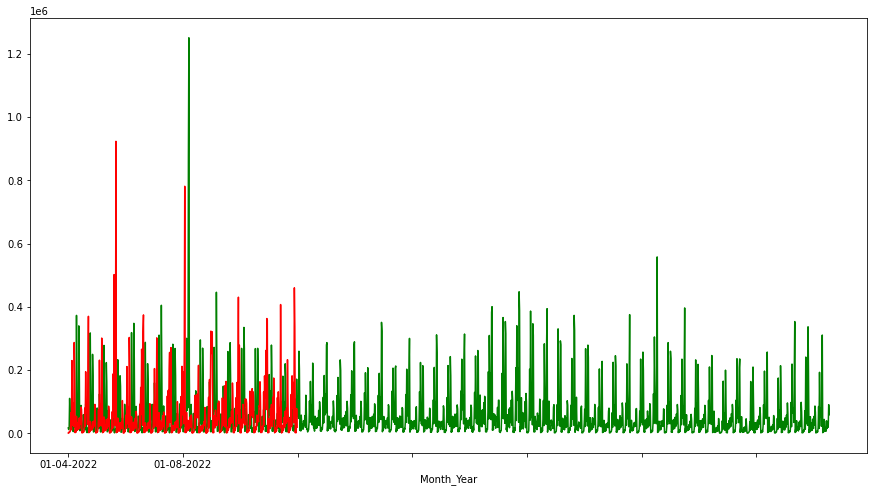

In [31]:
predict_ARIMA.plot(figsize=(15,8))
train['Level 4'].plot(label = 'train',color='green')
test['Level 4'].plot(label = 'test', color = 'red')
predict_ARIMA.plot(label = 'ARIMA(2,1,1)',color='blue');

## Part 5: Visualization

In [35]:
data

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,01-12-2022,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


### 1.	A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021.

In [55]:
data7 = data.loc[data['Year'] <= 2021]

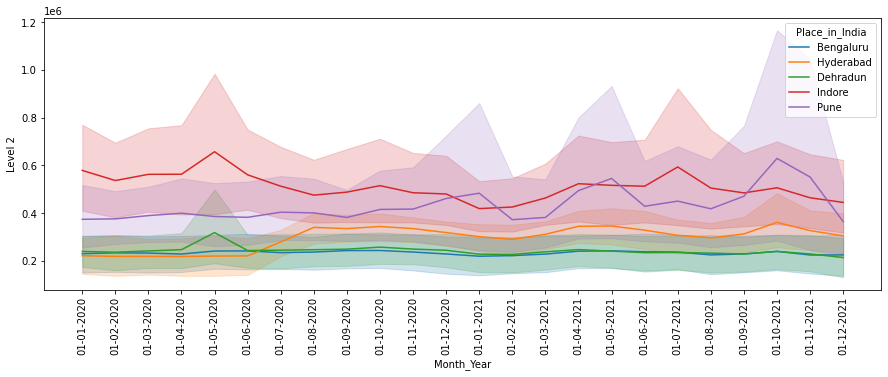

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot( x = "Month_Year", y = "Level 2", hue = "Place_in_India", data = data7)
plt.xticks(rotation = 90);

In [85]:
# For the years 2020 and 2021, Level 2 was highest in the city of Indore, followed by Pune,
# whereas Hyderabad is showing strong trend. 

### 2.	A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. 

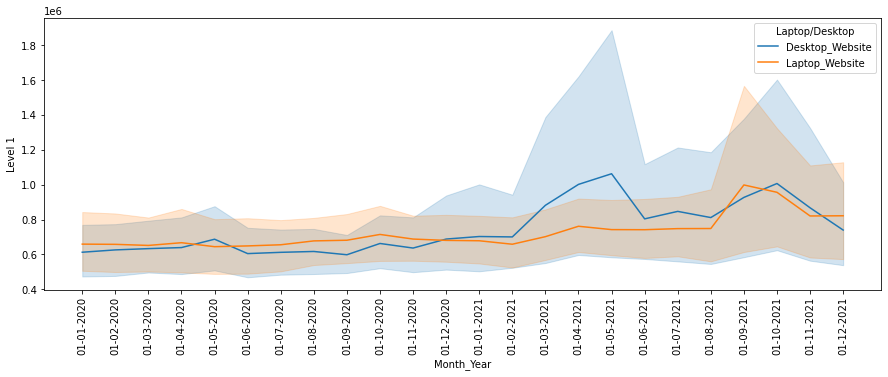

In [51]:
plt.figure(figsize=(15,5))
sns.lineplot( x = "Month_Year", y = "Level 1", hue = "Laptop/Desktop", data = data7)
plt.xticks(rotation = 90);

In [86]:
# For the years 2020 and 2021, Level 1 was highest in the Laptop_Website,
# whereas Desktop_Website is quite close to each other, which means that most of the users are using laptops.

### 3.	A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022.

In [54]:
data8 = data.loc[data['Year'] >= 2021]

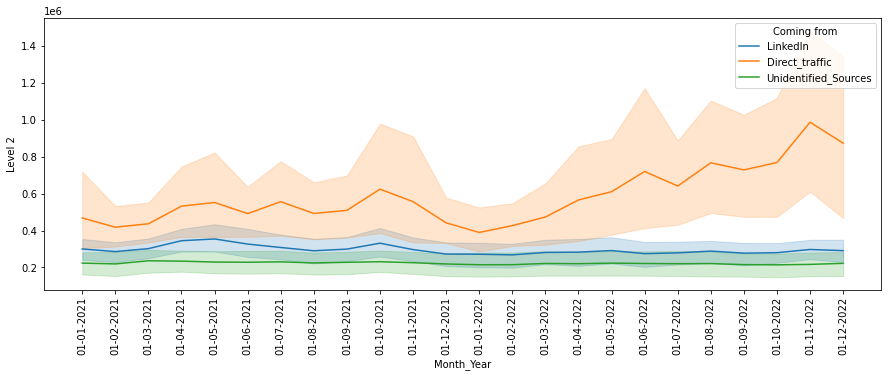

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot( x = "Month_Year", y = "Level 2", hue = "Coming from", data = data8)
plt.xticks(rotation = 90);

In [ ]:
# For the years 2021 and 2022, Level 2 is highest in the Direct_traffic, which is exhibiting strong trend, followed by LinkedIn
# whereas Unidentified_Sources has the least Level 2. 

### 4.	A line graph for “Level 1” and “Level 2” over the months of the year 2020, 2021 & 2022.

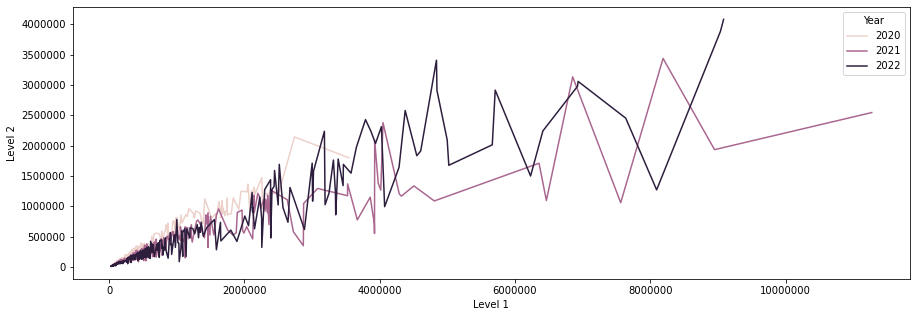

In [83]:
plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain')
sns.lineplot( x = "Level 1", y = "Level 2", hue = "Year", data = data);

In [87]:
# Year 2022 has the highest Level 1
# Year 2021 has the highest Level 2

### 5.	A line graph for “Level 3” foyearslace_in_India” over the months of the year 2020 and 2021.

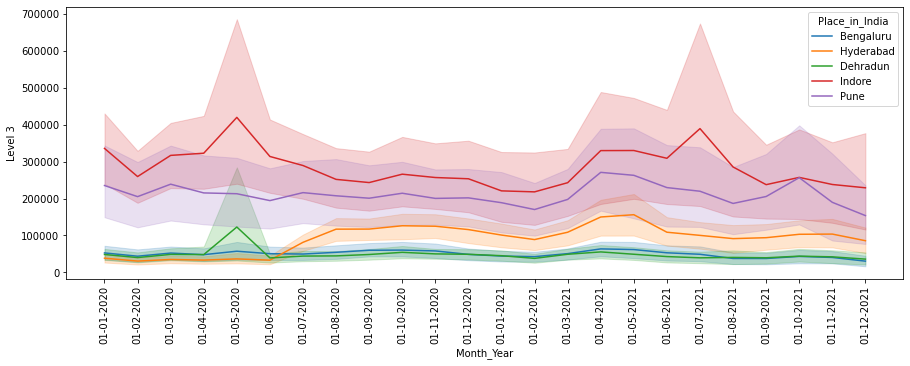

In [84]:
plt.figure(figsize=(15,5))
sns.lineplot( x = "Month_Year", y = "Level 3", hue = "Place_in_India", data = data7)
plt.xticks(rotation = 90);

In [88]:
# For the years 2020 and 2021, Level 3 is highest in the Indore, followed by Pune
# whereas Dehradun has the least Level 3.

## Part 6: About the Previous projects

### Project 1:

#### Title: House Price Prediction (Capstone Project - Great Learning)

#### Problem Statement:
    
    Predicting house prices can help to determine the buying/selling price of a house which help clients to find the right time to buy a home based on certain factors like area of a house, year the house, etc.
    
    As a result, regression techniques have been used to predict the efficient house pricing for customers with respect to their priority and budget.
    
#### Key skills

    Python, Pre-processing, EDA, Feature Engineering, Linear Regression, Decision Tree, Random Forest, KNN; Hyperparameter Tuning, Ensembling Techniques – Ada boosting, Gradient boosting.
    

Kaggle: https://www.kaggle.com/datasets/ashwinvaradaraju/house-price-prediction

### Project 2:

#### Title: Rock vs Mine Prediction
    
#### Problem Statement:
    
    This project is about predicting rocks against mines using SONAR technology with the help of Machine Learning. Submarines use the SONAR (Sound Navigation and Ranging) technology, which is a technique based on the principle of reflection of ultrasonic sound waves. These sound waves propagate through water and reflect on hitting the ocean bed or any object obstructing its path.
    
    Rock - 0, Mine - 1

#### Key skills:
    
    Data pre-processing, Train-Test split, ML Model Building (Logistic regression - works for binary (0,1) classification problem) - Supervised learning algorithm
    
Kaggle: https://www.kaggle.com/datasets/ashwinvaradaraju/sonar-mine-vs-rock

### Project 3:

#### Title: Gem Stones
    
#### Problem Statment:
    
    Hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer,  provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). As a data analyst, I've provided visualization uding differnet graphs and charts in order to understand the dataset and its correlation better.

#### Key skills:

    Data pre-processing, Data cleaning, EDA

Kaggle: https://www.kaggle.com/datasets/ashwinvaradaraju/gem-stones

##### I'll upload the Github links once I upload them in my account.

## Part 7: Time management

As an ex-Senior Editor in the field of transcription, I know the importance of time. My day-to-day role was to upload an context before its deadline with high accuracy. So I guess I'm quite aware of time management, its more like a discipline. When a task is assigned I would break up them into small segments and work on them diligently. I'm would always give my best in every aspect and would proceed with positive intent. Thank you. 